In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

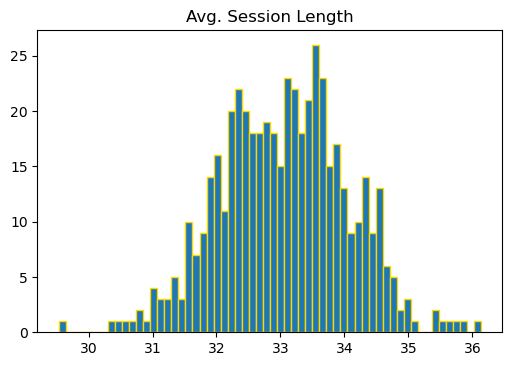

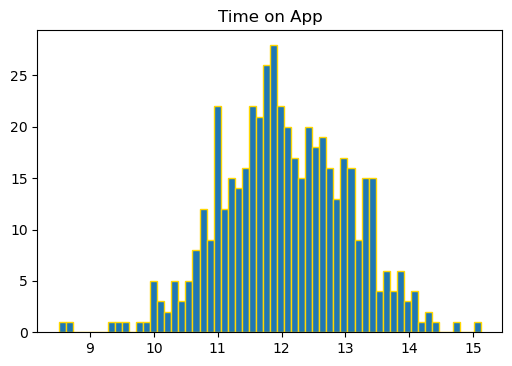

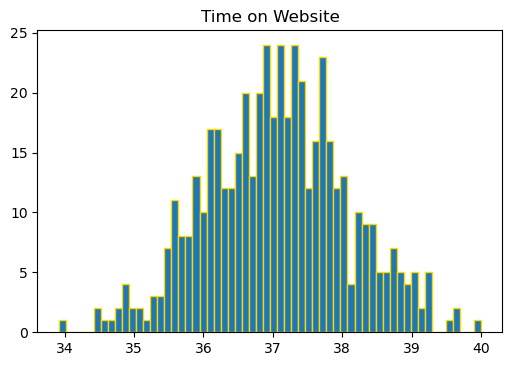

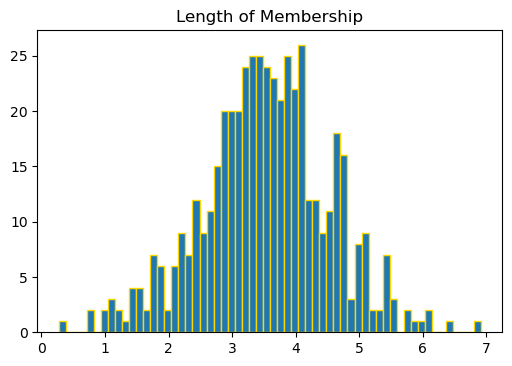

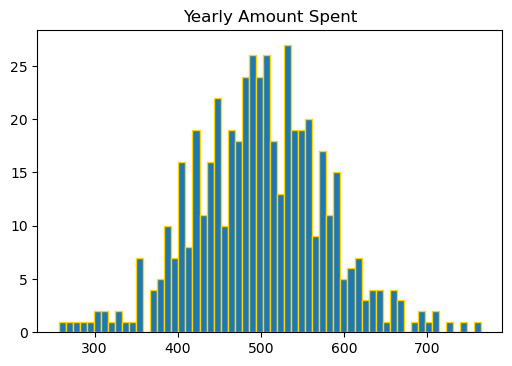

In [6]:
for column in df.drop(['Email','Address','Avatar'],axis=1):
    plt.figure(dpi=100)
    plt.title(column)
    plt.hist(column, bins=60, ec='gold', data=df)
    plt.xticks()
    plt.show()

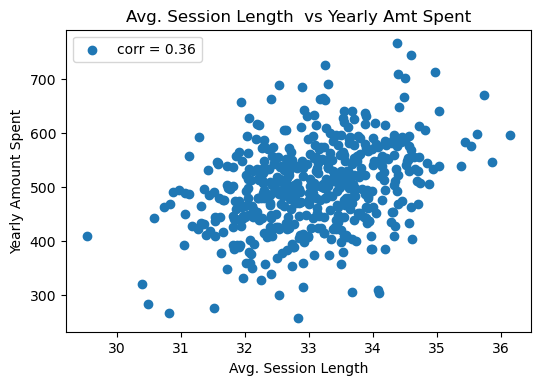

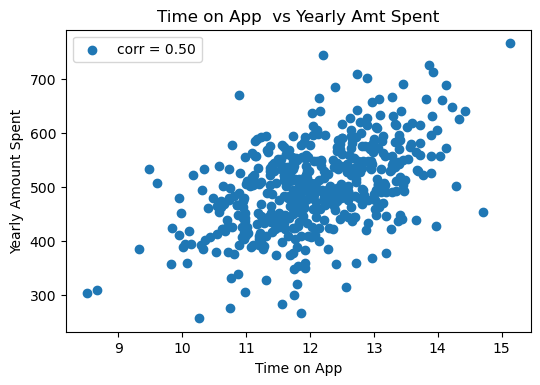

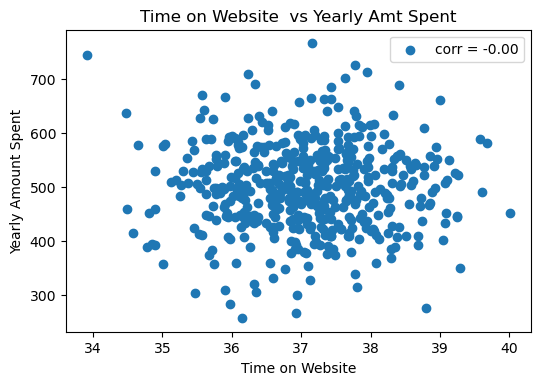

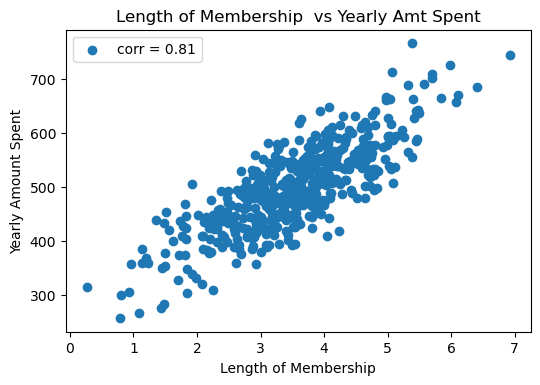

In [10]:
for column in df.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1):
    plt.figure(dpi=100)
    plt.title(f"{column}  vs Yearly Amt Spent")
    corr = np.corrcoef(df[column], df['Yearly Amount Spent'])[0,1]
    plt.scatter(df[column], df['Yearly Amount Spent'], label=f'corr = {corr:.2f}')
    plt.xlabel(column)
    plt.ylabel("Yearly Amount Spent")
    plt.legend()
    plt.show()

In [17]:
X= df.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
y=df['Yearly Amount Spent']

In [18]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [19]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=101,test_size=0.2)

In [22]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
161,33.503705,12.399436,35.012806,0.968622
72,32.386252,10.674653,38.006583,3.401522
246,31.909627,11.347264,36.323652,5.314354
230,32.351478,13.105159,35.574842,3.641497
391,33.481931,11.918670,37.317705,3.336339


In [24]:
X_train.to_numpy()

array([[33.50370518, 12.39943608, 35.01280603,  0.96862212],
       [32.38625186, 10.67465347, 38.00658318,  3.40152234],
       [31.90962683, 11.34726361, 36.32365247,  5.31435414],
       ...,
       [31.82797906, 12.46114744, 37.42899737,  2.97473682],
       [33.87936082, 11.584783  , 37.08792607,  3.7132092 ],
       [32.18984473, 11.38677555, 38.19748325,  4.80832037]])

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scale=StandardScaler()

In [27]:
X_train_tr=scale.fit_transform(X_train)

In [31]:
X_train_tr[0:5]

array([[ 0.45623087,  0.40709871, -2.06186556, -2.59351547],
       [-0.6515201 , -1.39157303,  0.97246989, -0.12014915],
       [-1.12400681, -0.69014848, -0.73326039,  1.82449851],
       [-0.68599189,  1.14305409, -1.49221573,  0.12381713],
       [ 0.43464533, -0.09426291,  0.27425906, -0.18641629]])

In [40]:
X_test_tr=scale.fit_transform(X_test)

In [41]:
X_test_tr[0:5]

array([[-0.9843893 ,  2.25674653,  1.03275811, -1.96761273],
       [-1.1043808 , -1.70291846,  1.76464912, -0.14617667],
       [-1.85336643, -1.11692847,  0.87774207, -0.15158956],
       [ 0.25976825,  0.51585901,  0.3863686 ,  0.81464222],
       [-0.868091  ,  0.19660184,  0.19558851,  1.42105153]])

In [32]:
from sklearn.linear_model import SGDRegressor

In [69]:
model=SGDRegressor(early_stopping=True,max_iter=10000)

In [70]:
model.fit(X_train_tr,y_train)

SGDRegressor(early_stopping=True, max_iter=10000)

In [71]:
train_actual=y_train
train_pred=model.predict(X_train_tr)

In [72]:
test_act=y_test
test_pred=model.predict(X_test_tr)

In [73]:
from sklearn.metrics import r2_score

In [74]:
print('Accuracy of training: ',r2_score(train_actual,train_pred)*100)
print('Accuracy of testing: ',r2_score(test_act,test_pred)*100)

Accuracy of training:  98.28936494434059
Accuracy of testing:  95.87126550314848
